In [ ]:
##################################
# Analysis -  Mouse Gastrulation #
##################################
# stage_endo_blood={'E7.0', 'E7.25', 'E7.5', 'E8.25', 'E7.75', 'E8.5', 'E8.0'}
# celltype_endo_blood={'Erythroid2', 'Blood progenitors 2', 'Erythroid3', 'Erythroid1', 'Blood progenitors 1',
#                    'Haematoendothelial progenitors','Blood progenitors 1'}
# Using all 2000 genes to plot cell velocity

In [1]:
from velocity_plot import velocity_plot as vpl
from turtle import color
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt
from sampling import *
import pandas as pd
from colormap import *
import random
import os

In [5]:
# load raw
raw_data_path = "/Users/wanglab/Documents/ShengyuLi/Velocity/data/raw_data/mouse_endo_blood20to25_2000_genes_moment100.csv"
load_raw_data = pd.read_csv(raw_data_path)

# combine detail
detail_result_path = '/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth'
path_name_after_no='_all_geneepoch200check_n10Lr0.001C2cf0.3Downneighbors0_200_200Ratio0.125N30OAdamtraceR0.0corrcoefR0.0nD30autoDTrueautoNTruecostTsmoothavgCWin10p3smoW0.1binTrue/detail_e200.csv'
load_cellDancer=pd.DataFrame()
for i in range(1,11):
    detail_path=os.path.join(detail_result_path,(str(i)+path_name_after_no))
    detail=pd.read_csv(detail_path)
    
    detail.rename(columns = {'Unnamed: 0':'cellIndex'}, inplace = True) # for the optimize of data_reshape
    detail = detail.sort_values(by = ['gene_name', 'cellIndex'], ascending = [True, True]) # for the optimize of data_reshape

    load_cellDancer=load_cellDancer.append(detail)
load_cellDancer=load_cellDancer.reset_index(drop=True)
load_cellDancer_bkup=load_cellDancer.copy()

# define output path
output_path = '/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/cell_velocity'

In [7]:
load_cellDancer

,cellIndex,gene_name,s0,u0,s1,u1,alpha,beta,gamma,cost
0,0,2810025M15Rik,1.515440,0.000000,1.514860,0.000022,0.001560,0.022612,0.005908,0.087183
1,1,2810025M15Rik,1.574459,0.000000,1.573860,0.000022,0.001522,0.022650,0.005876,0.087183
2,2,2810025M15Rik,1.744201,0.000000,1.743548,0.000020,0.001426,0.022751,0.005787,0.087183
3,3,2810025M15Rik,1.332406,0.000000,1.331888,0.000024,0.001682,0.022495,0.006009,0.087183
4,4,2810025M15Rik,1.261786,0.000000,1.261292,0.000025,0.001732,0.022449,0.006049,0.087183
...,...,...,...,...,...,...,...,...,...,...
24657995,12324,Zrsr2,0.255452,0.030816,0.323642,0.022484,0.005919,0.101278,0.144163,0.126370
24657996,12325,Zrsr2,0.204272,0.049630,0.322781,0.036203,0.008434,0.100651,0.142879,0.126370
24657997,12326,Zrsr2,0.230350,0.050146,0.349145,0.036532,0.008174,0.100769,0.143180,0.126370
24657998,12327,Zrsr2,0.236227,0.052799,0.361591,0.038445,0.008380,0.100769,0.143180,0.126370


In [13]:
def tune_cell_velocity_curve(load_raw_data,load_cellDancer):
    for n_neighbors in n_neighbors_list:
        print('------n_neighbors'+str(n_neighbors))
        for add_amt_gene in add_amt_gene_list:
            print('------add_amt_gene'+str(add_amt_gene))
            for transfer_mode in transfer_mode_list:
                for mode in mode_list:
                    for pca_n_components in pca_n_components_list: # pca
                        for umap_n in umap_n_list: # umap
                            for umap_n_components in umap_n_components_list: # umap
                                for min_mass in min_mass_list:
                                    for grid_step in grid_step_list:
                                        for color_list in color_list_full:
                                            colors = {
                                            'Haematoendothelial progenitors':color_list[0],
                                            'Blood progenitors 1':color_list[1],
                                            'Blood progenitors 2':color_list[2],
                                            'Erythroid1':color_list[3],
                                            'Erythroid2':color_list[4],
                                            'Erythroid3':color_list[5]}

                                            file_name_additional_info="_transfer"+str(transfer_mode)+'_mode'+str(mode)+'_pcaN'+str(pca_n_components)+"_umapN"+str(umap_n)+'_umapNcomponents'+str(umap_n_components)+'_minMass'+str(min_mass)+'_grid_step'+str(grid_step)
                                            save_path = output_path
                                            # velocity_cell_draft(load_raw_data_four_samples,load_cellDancer_four_samples,n_neighbors,add_amt_gene, save_path=save_path, save_csv=True,gene_list=None, custom_xlim=None,colors=colors,step=(100,100),mode='embedding')
                                            # vpl.velocity_cell_map(load_raw_data,load_cellDancer,n_neighbors,add_amt_gene, save_path=save_path, save_csv=True, gene_list=None, custom_xlim=None,colors=colors,step=(100,100),mode='gene')
                                            # velocity_cell_map_umap_draft(load_raw_data_cf02_geneAmt952,load_cellDancer_cf02_geneAmt952,n_neighbors,add_amt_gene, save_path=save_path, save_csv=True, gene_list=None, custom_xlim=None,colors=colors,step=(100,100),mode=mode,pca_n_components=pca_n_components,file_name_additional_info=file_name_additional_info,umap_n=umap_n)
                                            # try:
                                            vpl.velocity_cell_map_curve(load_raw_data,load_cellDancer,n_neighbors,add_amt_gene, save_path=save_path, save_csv=True, gene_list=None, colors=colors,step=(100,100),mode=mode,pca_n_components=pca_n_components,file_name_additional_info=file_name_additional_info,umap_n=umap_n,transfer_mode=transfer_mode,umap_n_components=umap_n_components,min_mass=min_mass,grid_steps=(grid_step, grid_step),custom_xlim=[-6,13],custom_ylim=[2,16],alpha_inside=0.3,use_downsampling= False)
                                            # except:
                                                # print("Exception: "+file_name_additional_info)

------n_neighbors10
------add_amt_gene2000
neighbors
tranfer mode: power10
using gene mode
(2000, 12329)
(2000, 12329)


/Users/wanglab/Documents/ShengyuLi/Velocity/bin/cellDancer-development_20220128/src/get_embedding.py:50: RuntimeWarning: invalid value encountered in true_divide
  np.sqrt(np.dot(ematrix_ss[:, None], vmatrix_ss[None]))


2.542052447119915
1.1847102222680879
0.4660447598594342


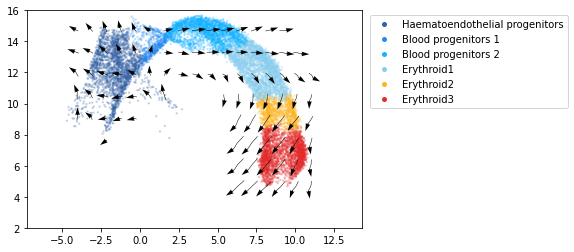

In [14]:
# we finally choose mode='gene', transfer mode='power10'

n_neighbors_list=[10]
add_amt_gene_list=[2000]

mode_list=['gene']
transfer_mode_list=['power10']

pca_n_components_list=[None] # 2d and 3d'
umap_n_list=[None]
umap_n_components_list=[None]

min_mass_list=[15]
grid_step_list=[20]

color_list_full=[solarExtra02]

tune_cell_velocity_curve(load_raw_data,load_cellDancer)



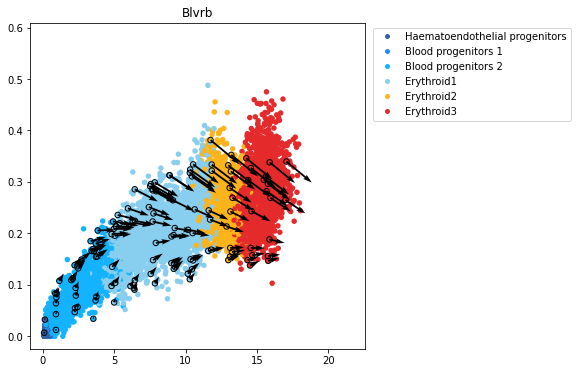

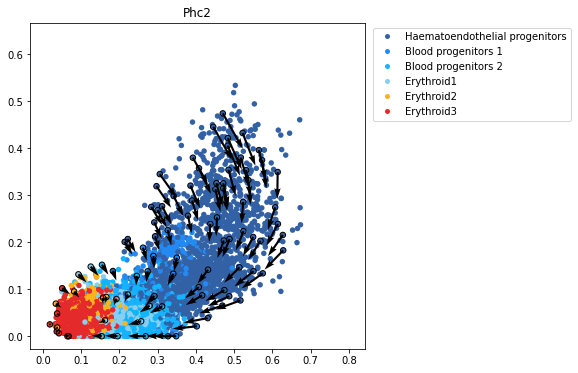

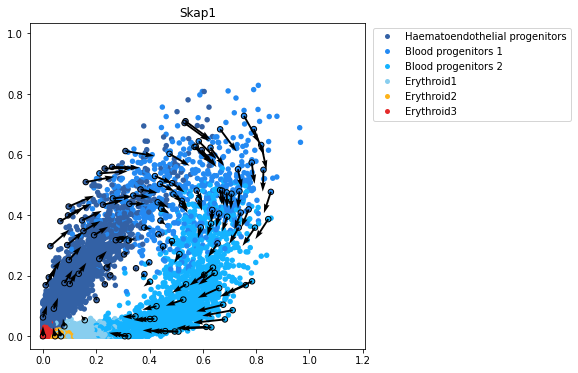

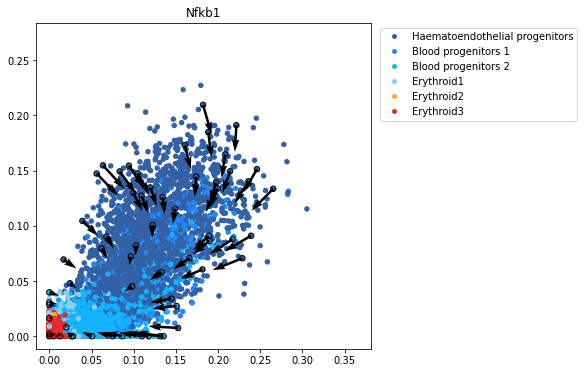

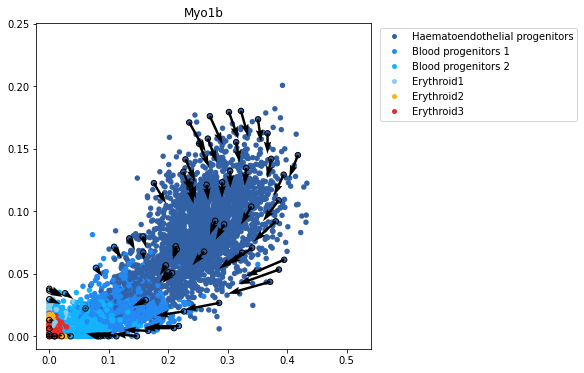

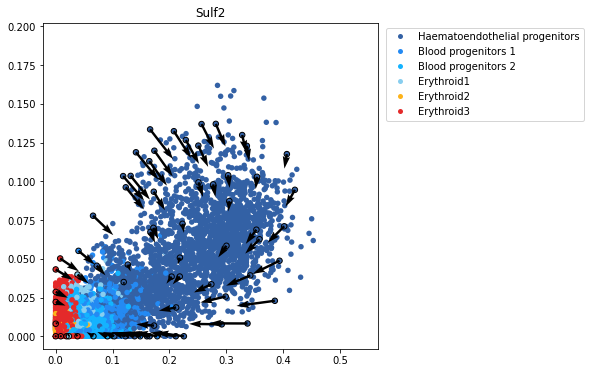

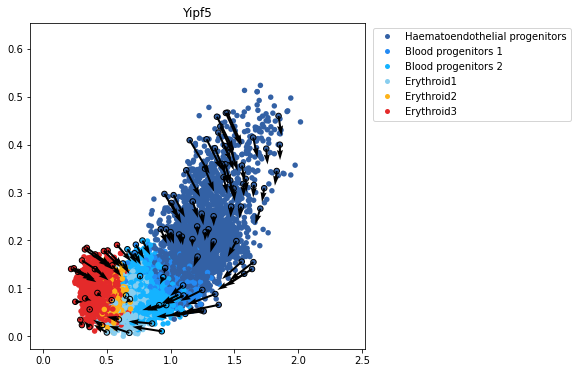

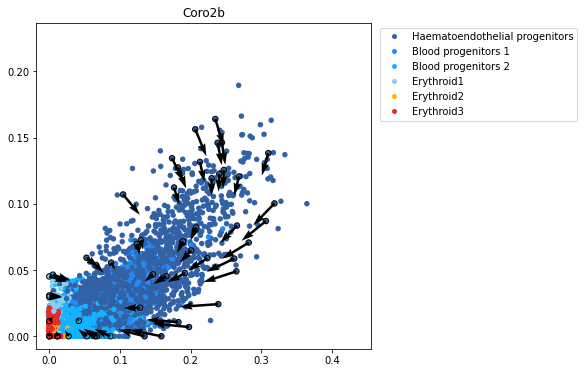

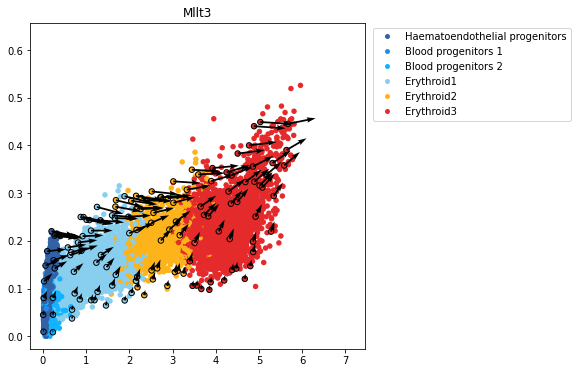

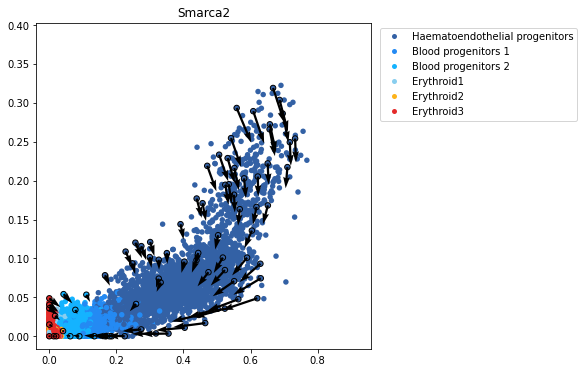

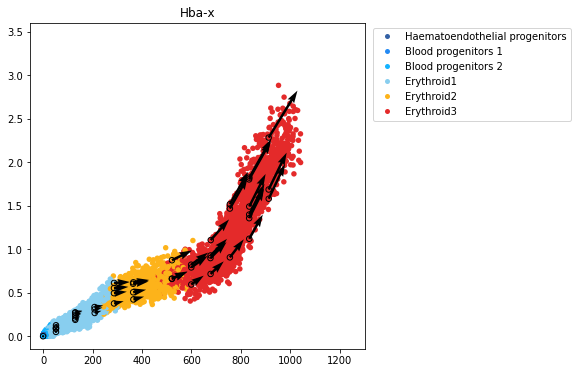

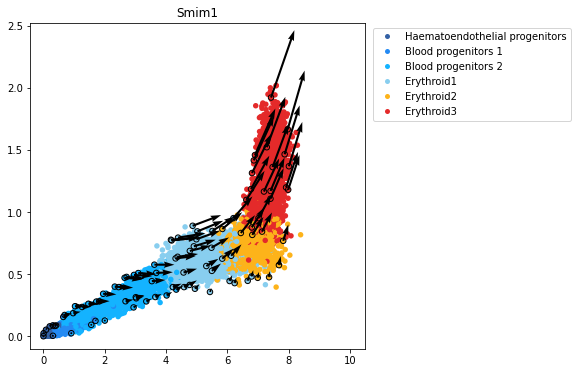

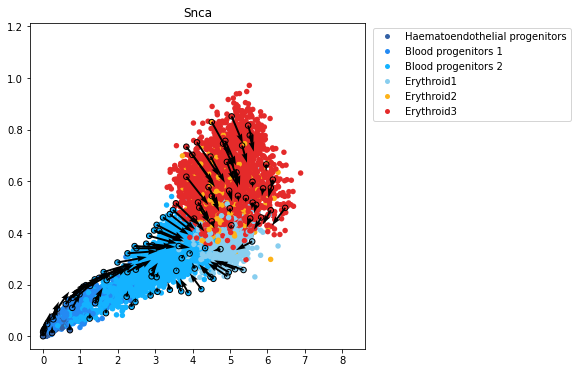

In [12]:
# gene velocity plot
color_list=solarExtra02.copy()

colors = {
'Haematoendothelial progenitors':color_list[0],
'Blood progenitors 1':color_list[1],
'Blood progenitors 2':color_list[2],
'Erythroid1':color_list[3],
'Erythroid2':color_list[4],
'Erythroid3':color_list[5]}

four_samples=['Smim1','Hba-x','Myo1b','Coro2b']
four_samples=["Blvrb",
"Phc2",
"Skap1",
"Nfkb1",
"Myo1b",
"Sulf2",
"Yipf5",
"Coro2b",
"Mllt3",
"Smarca2",
"Hba-x",
"Smim1",
"Snca"]

one_gene_raw=load_raw_data[load_raw_data.gene_list==load_raw_data.gene_list.iloc[0]]
cluster_info=one_gene_raw['clusters']
save_dir='/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/gene_velocity/'
for gene in four_samples:
    vpl.velocity_gene(gene,load_cellDancer,colors=colors,mode='cluster',cluster_annot=True,cluster_info=cluster_info,point_size=30,alpha_inside=1,save_path=save_dir+gene+'.pdf')

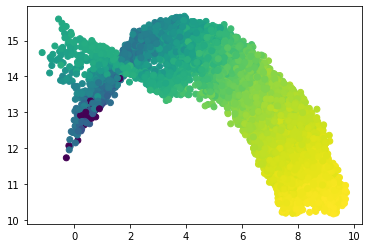

In [6]:
# Hba-x s0 in three clusters
load_raw_data_hba=load_raw_data[load_raw_data.gene_list.isin(['Hba-x'])].reset_index()
load_cellDancer_hba=load_cellDancer[load_cellDancer.gene_name.isin(['Hba-x'])].reset_index()
cell_keep=['Blood progenitors 2','Blood progenitors 1','Erythroid1']
load_raw_data_hba=load_raw_data_hba[load_raw_data_hba.clusters.isin(cell_keep)]
plt.scatter(load_raw_data_hba.embedding1, load_raw_data_hba.embedding2,c=np.log((load_raw_data_hba.s0+0.0001).to_numpy()))
# plt.savefig('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes/cell_level_s0/Hba-x_s0_21BP1_22BP2_23ERY1.pdf')

In [14]:
gene_list=load_cellDancer.gene_name.drop_duplicates()
for i,gene in enumerate(gene_list[2000:2001]):
    print(str(i)+gene)
    vpl.velocity_gene(gene,load_cellDancer,colors=colors,mode='cluster',cluster_annot=True,cluster_info=cluster_info,point_size=30,alpha_inside=1,save_path=save_dir+gene+'.pdf')